# AAlogorizer Example Sheet

### Imports

In [1]:
import pandas as pd
import AALogorizer
import StandardConfig

### Import File as pandas.DataFrame

In [2]:
# directory management
path, sep = StandardConfig.find_folderpath()
path, sep

('C:\\Users\\Feiler Werner\\Desktop\\AAlogorizer', '\\')

In [3]:
# import of test data sequences for visualization
test_data = pd.read_excel(f"{path}{sep}example_data{sep}DeepTMHMM_sub.xlsx")
test_data.head(5)

,Unnamed: 0,entry,name,gene_name,organism,dataset,length_seq,len_signal,start_pos_signal,stop_pos_signal,len_ecto,start_pos_ecto,stop_pos_ecto,len_TMD,start_pos_TMD,stop_pos_TMD,len_endo,start_pos_endo,stop_pos_endo,sequence
0,0,Q03157,APLP1_MOUSE,Aplp1,MOUSE,SUBEXPERT,654,38.0,1.0,38.0,546,39,584,21,585,605,49,606,654,MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...
1,1,Q06481,APLP2_HUMAN,APLP2,HUMAN,SUBEXPERT,763,31.0,1.0,31.0,662,32,693,21,694,714,49,715,763,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...
2,2,P05067,A4_HUMAN,APP,HUMAN,SUBEXPERT,770,17.0,1.0,17.0,683,18,700,21,701,721,49,722,770,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...
3,3,P30530,UFO_HUMAN,AXL,HUMAN,SUBEXPERT,894,32.0,1.0,32.0,419,33,451,21,452,472,422,473,894,MAWRCPRMGRVPLAWCLALCGWACMAPRGTQAEESPFVGNPGNITG...
4,4,P35613,BASI_HUMAN,BSG,HUMAN,SUBEXPERT,385,20.0,1.0,20.0,303,21,323,21,324,344,41,345,385,MAAALFVLLGFALLGTHGASGAAGFVQAPLSQQRWVGGSVELHCEA...


#### important columns:
    start_pos_TMD
    stop_pos_TMD
    sequence

### Generate AALogos

### with config file 

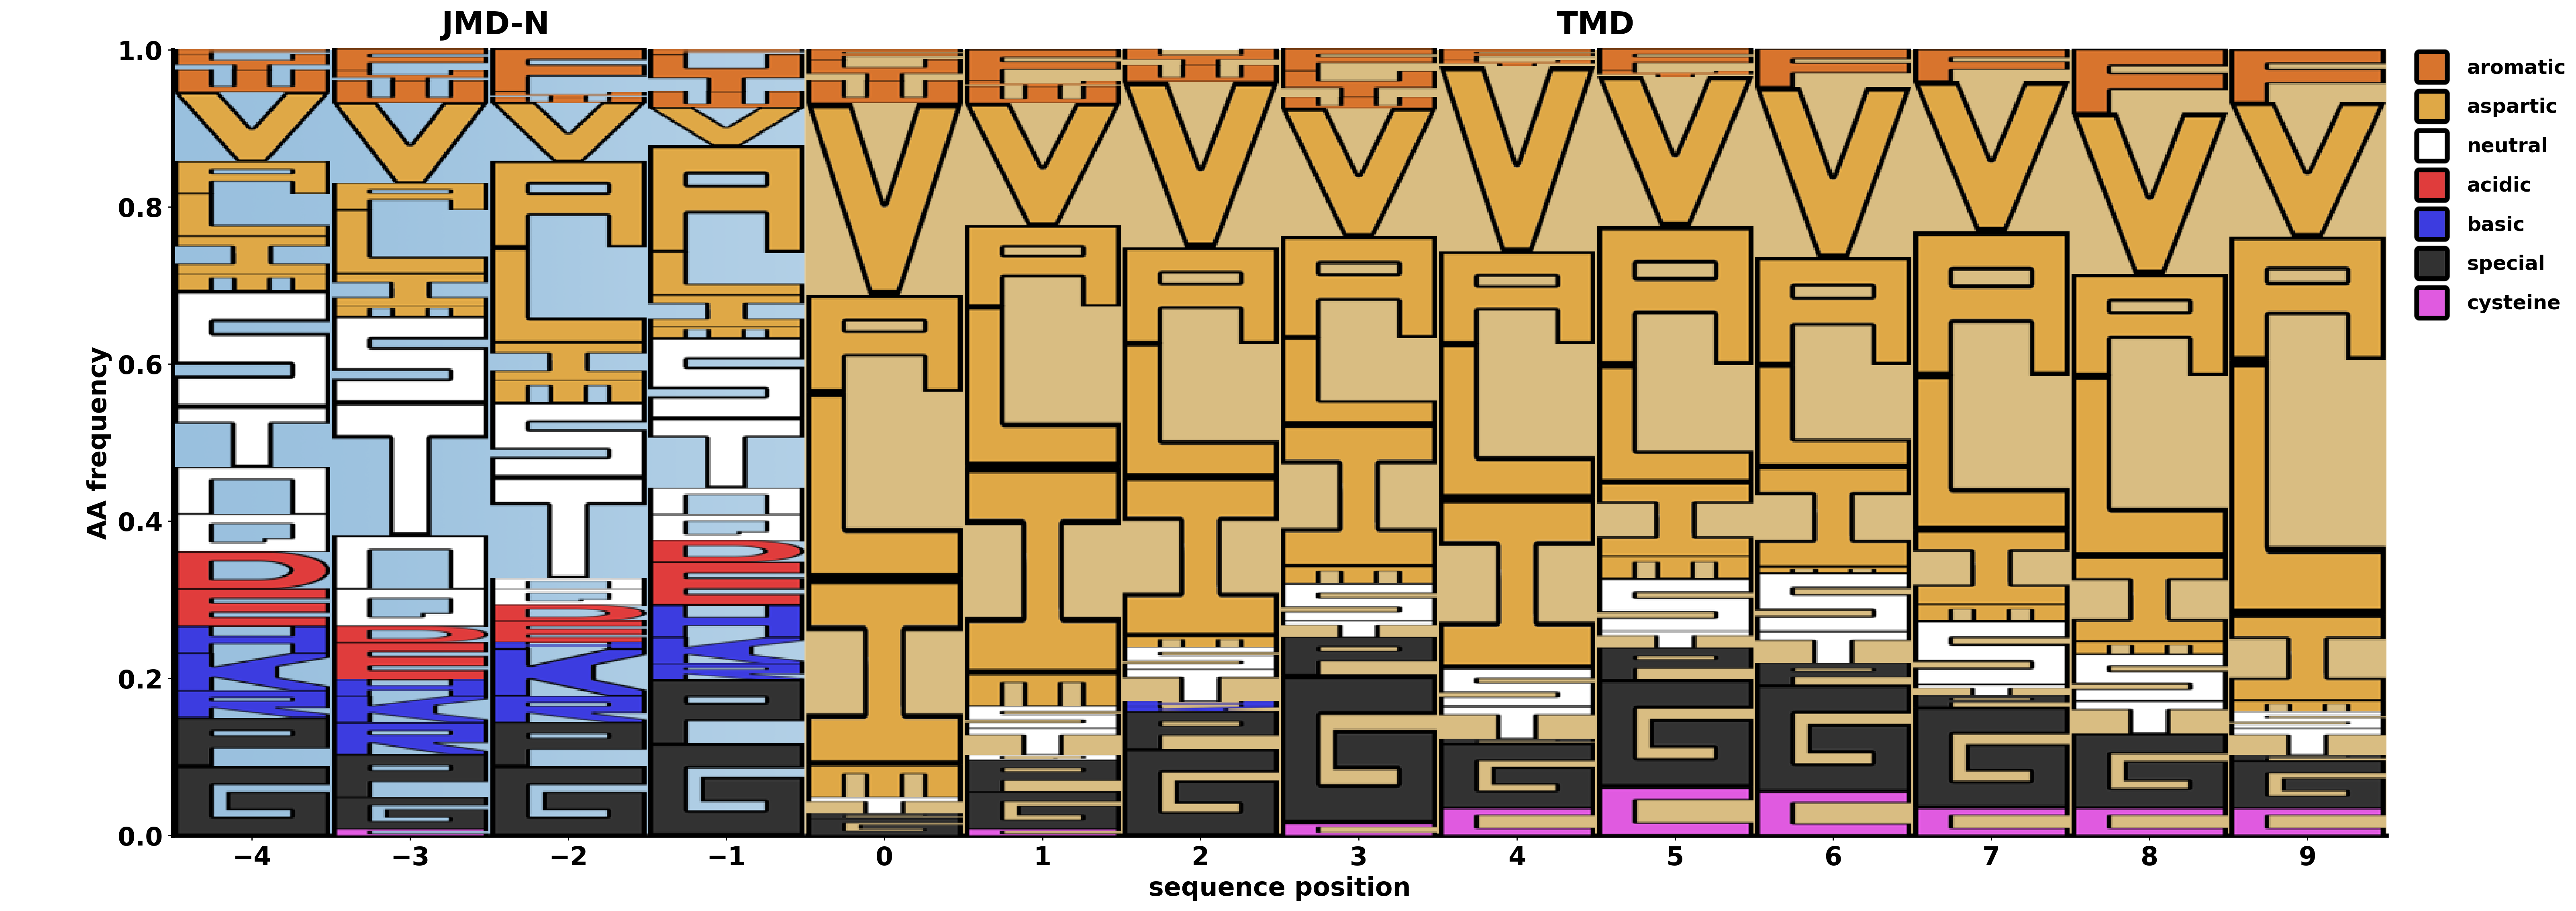

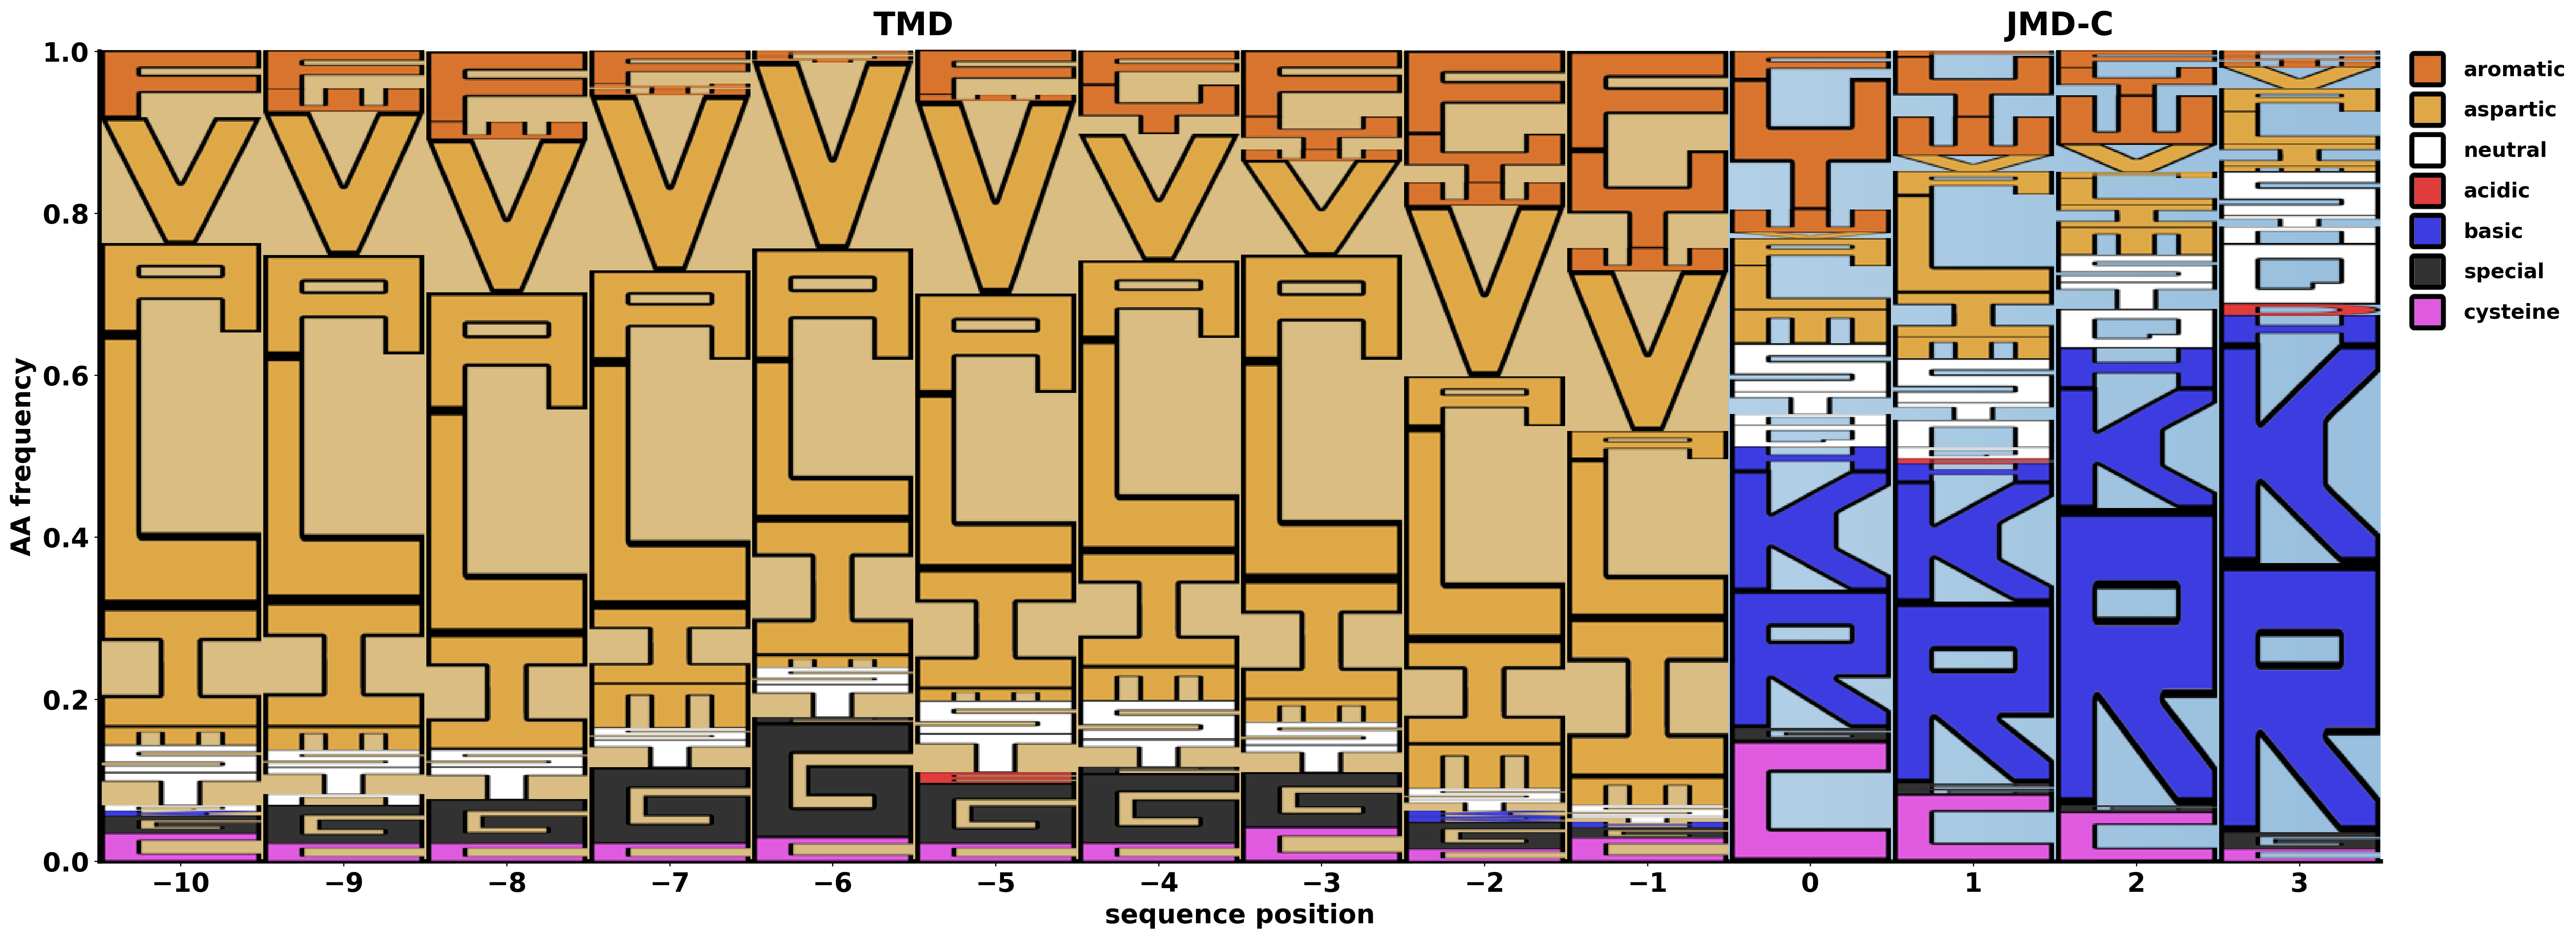

In [4]:
df_columns = ["sequence", "start_pos_TMD", "stop_pos_TMD"]

# initialization
# set_legend, list_columns
Example_AAlogo = AALogorizer.AALogoGenerator(set_legend=True, list_columns=df_columns)

# Plot generation command
# make_logo(df, name, length_tmd, length_jmd, aa_config_section_name, font_type="classic_AA_fonts")
Example_AAlogo.make_logo(df=test_data, name="Substrates_TMHMM", length_tmd=10, length_jmd=4, 
                         aa_config_section_name="OG_AA_config", font_type="bold_AA_fonts")

In [5]:
### color mapping (inpult hydrophobicity order (Kyte and Doolittle, 1982) and coloring)

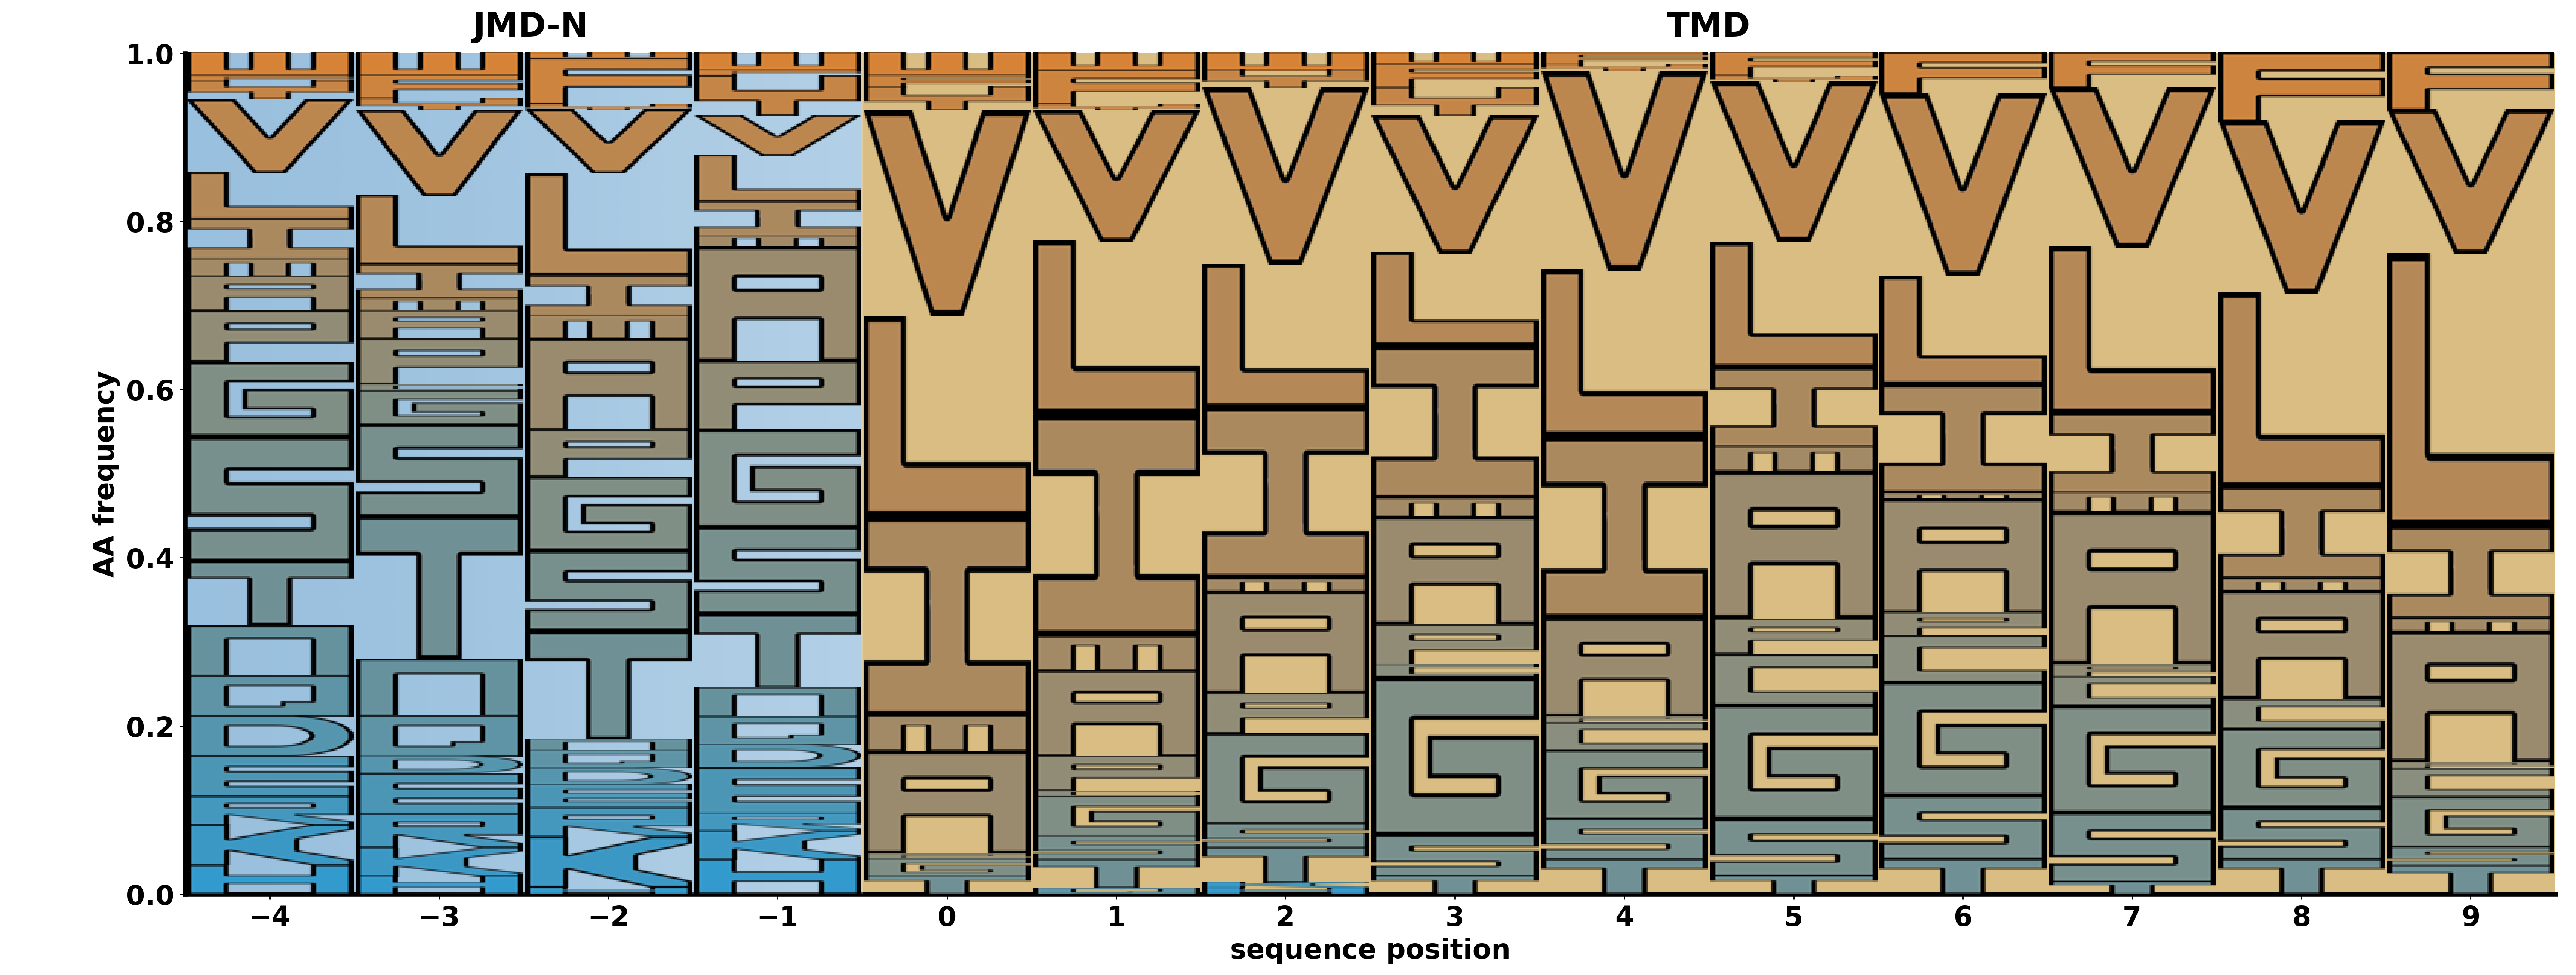

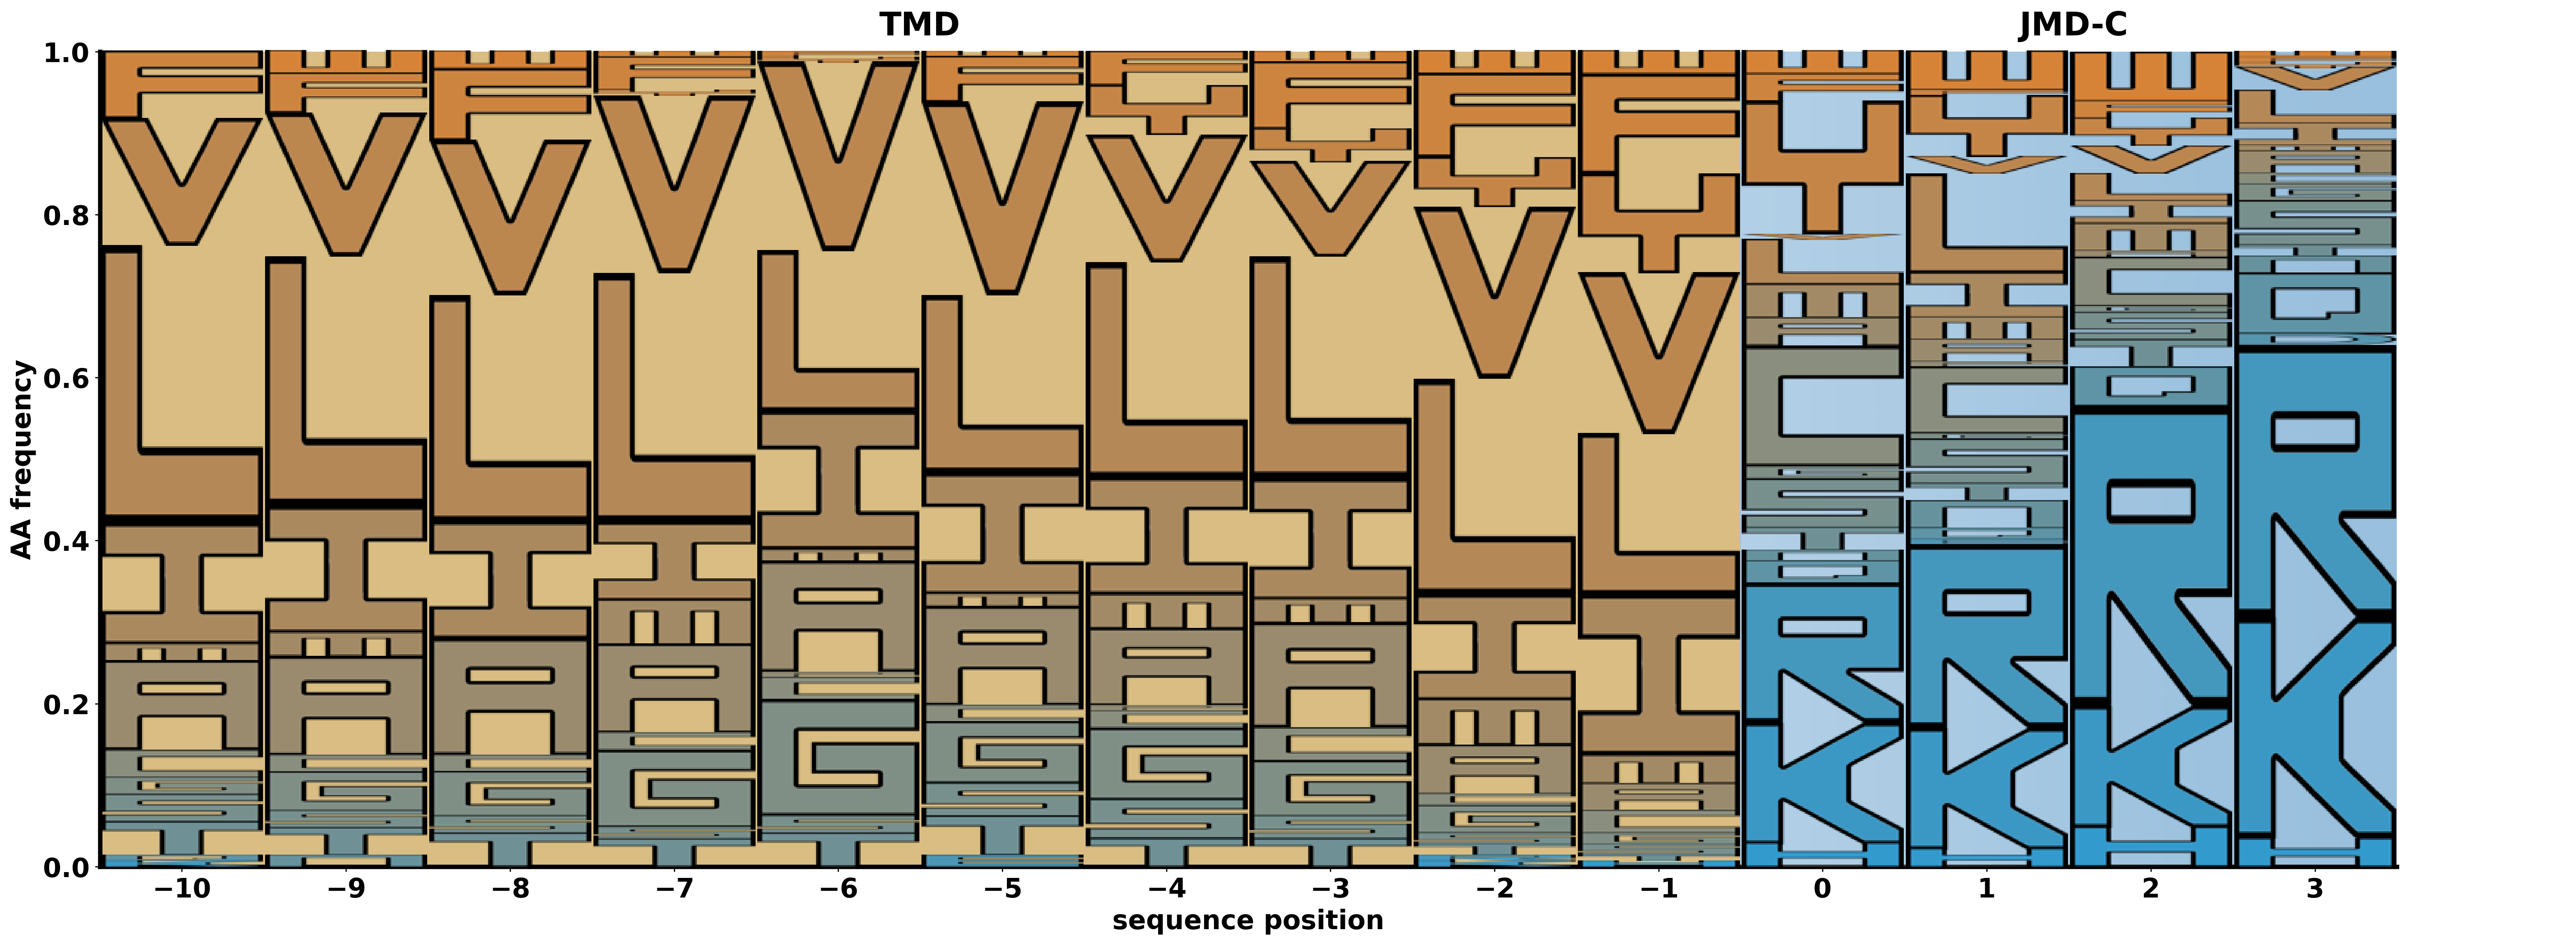

In [7]:
# initialization
# set_legend, list_columns
Example2_AAlogo = AALogorizer.AALogoGenerator(set_legend=False, list_columns=df_columns)  # legend automatically set False

# Plot generation command
# make_logo(df, name, length_tmd, length_jmd, aa_config_section_name, font_type="classic_AA_fonts")
Example2_AAlogo.make_logo(df=test_data, name="Substrates_TMHMM", length_tmd=10, length_jmd=4, 
                          font_type="bold_AA_fonts", config_set = False)